# Introduction to Neural Networks | Project 2 | SVNH Case Study

## About Case:

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data preprocessing and formatting.

##*Connecting Google Drive with Colab*

In [0]:
from google.colab import drive

In [5]:
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


##*Load Key Libraries*

In [0]:
# Import Basic Libraries
import numpy as np
import pandas as pd

# To read and write HDF5 file
import h5py

# Import Datavisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.misc import toimage

# Set Theme for Data Visualization
%matplotlib inline
sns.set_style('whitegrid')

# Mitigating Warnings
import warnings
warnings.filterwarnings('ignore')

# For time based calculations
import time

# Import Libraries for Statistical Analysis
import scipy.stats as stats

# Import Libraries for Train-Test split, Scaling and Metric calculation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Identification of optimum value for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import TensorFlow and Keras
import tensorflow as tf
import keras

In [0]:
#Reset Default graph - Needed only for Jupyter notebook
tf.reset_default_graph()
tf.set_random_seed(40)

##*Collect Data - Data Fetching and understand the train/val/test Split*

In [0]:
# Read Image Data
numdf = h5py.File('/content/gdrive/My Drive/AIML/Projects/Datasets/SVHN_single_grey1.h5','r+')

In [11]:
# Note that h5py.File act like Python Dictionary, thus we can check keys
list(numdf.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [12]:
# Creating individual Dataset Object

# Training Object
trainX = numdf['X_train']
trainY = numdf['y_train']

# Testing Object
testX = numdf['X_test']
testY = numdf['y_test']

# Validation Object
valX = numdf['X_val']
valY = numdf['y_val']

# Shape of Train and Test Data

print("Training Object Shape:")
print("Train X:",trainX.shape)
print("Train Y:",trainY.shape,"\n")

print("Testing Object Shape:")
print("Test X:",testX.shape)
print("Test Y:",testY.shape,"\n")

print("Validation Object Shape:")
print("Validation X:",valX.shape)
print("Validation Y:",valY.shape,"\n")

Training Object Shape:
Train X: (42000, 32, 32)
Train Y: (42000,) 

Testing Object Shape:
Test X: (18000, 32, 32)
Test Y: (18000,) 

Validation Object Shape:
Validation X: (60000, 32, 32)
Validation Y: (60000,) 



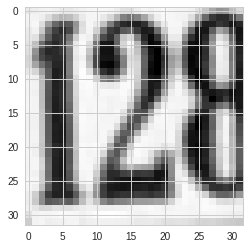

In [13]:
# Image Visualization - Training Image

plt.imshow(trainX[0])

In [14]:
# Label Visualization - Training Label
trainY[0]

2

In [15]:
# Shape of Image
trainX[0].shape

(32, 32)

We can see that our image shape is 32x32 and since its a grey scale image hence its overall dimension will be 32x32x1

##*Implement and Apply an Optimal k-Nearest Neighbour Classifier and Print Classification Metrics Report*

As our data is a 3D data (image with 32x32x1 dimensions) for KNN first we need to conver it into 2D

In [16]:
# Converting Training Images from 3D to 2D
train_sample, train_d1, train_d2 = trainX.shape
trainX2d = np.reshape(trainX,((train_sample,train_d1*train_d2)))
print("Shape of Training Data after Conversion",trainX2d.shape)

# Converting Testing Images from 3D to 2D
test_sample, test_d1, test_d2 = testX.shape
testX2d = np.reshape(testX,((test_sample,test_d1*test_d2)))
print("Shape of Test Data after Conversion",testX2d.shape)

# Converting Validation Images from 3D to 2D
val_sample, val_d1, val_d2 = valX.shape
valX2d = np.reshape(valX,((val_sample,val_d1*val_d2)))
print("Shape of Validation Data after Conversion",valX2d.shape)

Shape of Training Data after Conversion (42000, 1024)
Shape of Test Data after Conversion (18000, 1024)
Shape of Validation Data after Conversion (60000, 1024)


After reshaping our data, we can apply KNN on our dataset. Below fitting a "n_neighbours = 5" KNN.

In [17]:
start = time.time()

knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'brute')
knn.fit(trainX2d, trainY)
predictions = knn.predict(testX2d)

end = time.time()
print("Time Taken (in sec):",end-start)

Time Taken (in sec): 37.56272077560425


Classification Metric Report for KNN with 5 Neighbours

In [18]:
print("Accuracy:", knn.score(testX2d,testY))

Accuracy: 0.49016666666666664


In [19]:
print(classification_report(testY, predictions))

              precision    recall  f1-score   support

           0       0.38      0.66      0.48      1814
           1       0.44      0.70      0.54      1828
           2       0.55      0.52      0.53      1803
           3       0.42      0.39      0.41      1719
           4       0.67      0.61      0.64      1812
           5       0.48      0.36      0.41      1768
           6       0.47      0.38      0.42      1832
           7       0.72      0.58      0.64      1808
           8       0.42      0.33      0.37      1812
           9       0.52      0.36      0.43      1804

   micro avg       0.49      0.49      0.49     18000
   macro avg       0.51      0.49      0.49     18000
weighted avg       0.51      0.49      0.49     18000



Identify Optimum Value for 'n_neighbours' in KNN

In [20]:
start = time.time()

kVals = range(1, 30, 2)
accuracies = []

for k in range(1, 30, 2):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k, algorithm = 'brute')
          model.fit(trainX2d, trainY)
          # evaluate the model and update the accuracies list
          score = model.score(testX2d, testY)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)

# find the value of k that has the largest accuracy
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))

end = time.time()
print("Time Taken (in sec):",end-start)

k=1, accuracy=45.92%
k=3, accuracy=46.17%
k=5, accuracy=49.02%
k=7, accuracy=50.71%
k=9, accuracy=51.24%
k=11, accuracy=51.80%
k=13, accuracy=52.11%
k=15, accuracy=52.36%
k=17, accuracy=52.88%
k=19, accuracy=52.72%
k=21, accuracy=52.89%
k=23, accuracy=52.97%
k=25, accuracy=52.97%
k=27, accuracy=53.23%
k=29, accuracy=53.17%
k=27 achieved highest accuracy of 53.23% on validation data
Time Taken (in sec): 525.8293886184692


In [21]:

# Rebuilding KNN model with n_neighbors = 27

start = time.time()

knn1 = KNeighborsClassifier(n_neighbors=27, algorithm = 'brute')
knn1.fit(trainX2d, trainY)
predictions1 = knn1.predict(testX2d)

end = time.time()
print("Time Taken (in sec):",end-start,"\n")
print("Accuracy:", knn1.score(testX2d,testY),"\n")

Time Taken (in sec): 35.55411696434021 

Accuracy: 0.5322777777777777 



In [22]:
# Classification Report for KNN with n_neighbors = 27
print(classification_report(testY, predictions1))

              precision    recall  f1-score   support

           0       0.46      0.71      0.56      1814
           1       0.46      0.73      0.56      1828
           2       0.64      0.54      0.58      1803
           3       0.47      0.43      0.45      1719
           4       0.64      0.65      0.65      1812
           5       0.53      0.40      0.45      1768
           6       0.51      0.41      0.46      1832
           7       0.71      0.62      0.66      1808
           8       0.47      0.37      0.41      1812
           9       0.55      0.44      0.49      1804

   micro avg       0.53      0.53      0.53     18000
   macro avg       0.54      0.53      0.53     18000
weighted avg       0.54      0.53      0.53     18000



##*1. Implement and Apply a Deep Neural Network Classifier including - feedforward neural network with RELU activation*
##*2. Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)*
##*3. Implement batch normalization for training the neural network*

One Hot Encoding for Labels

In [23]:
# One hot encoding for output label

trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)
valY = tf.keras.utils.to_categorical(valY, num_classes=10)

print("Train Y:",trainY.shape)
print("Test Y:",testY.shape)
print("Val Y:",valY.shape)

Train Y: (42000, 10)
Test Y: (18000, 10)
Val Y: (60000, 10)


In [0]:
# Also Converting the data into np.array for free use of keras batch functionality

trainX = np.array(trainX)
testX = np.array(testX)
valX = np.array(valX)

###*Build and Execute the graph*

In [25]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [26]:
# Review the Model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
Total para

###*Execute the Graph*

In [27]:
start = time.time()

model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=42)

end = time.time()
print("Time Taken (in sec):",end-start)

Train on 42000 samples, validate on 18000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
42000/42000 [==============================] - 7s 160us/sample - loss: 2.1408 - acc: 0.2322 - val_loss: 1.7453 - val_acc: 0.4297
Epoch 2/30
42000/42000 [==============================] - 6s 138us/sample - loss: 1.4200 - acc: 0.5426 - val_loss: 1.1092 - val_acc: 0.6504
Epoch 3/30
42000/42000 [==============================] - 6s 137us/sample - loss: 1.0904 - acc: 0.6553 - val_loss: 0.9786 - val_acc: 0.7039
Epoch 4/30
42000/42000 [==============================] - 6s 139us/sample - loss: 0.9449 - acc: 0.7038 - val_loss: 0.8938 - val_acc: 0.7242
Epoch 5/30
42000/42000 [==============================] - 6s 139us/sample - loss: 0.8544 - acc: 0.7316 - val_loss: 0.7786 - val_acc: 0.7680
Epoch 6/30
42000/42000 [==============================] - 6s 139us/sample - loss: 0.7819 - acc: 0.7568 - val_loss: 0.7862 - val_acc: 0.7649
Epoch 7/30
42000/42000 [==============================] - 6s 1

###*Develop Predcition*

In [28]:
#Model prediction
prediction_nn = model.predict(testX)

# Model Accuracy
score_train = model.evaluate(trainX, trainY)
score_test = model.evaluate(testX, testY)
print()
print('Training accuracy: ', score_train[1])
print('Test accuracy: ', score_test[1])

18000/18000 [==============================] - 1s 75us/sample - loss: 0.5585 - acc: 0.8484

Training accuracy:  0.9212381
Test accuracy:  0.84844446


In [29]:
# Classification Report for KNN with n_neighbors = 27

testY_class = testY.argmax(axis=-1)
pred_class = prediction_nn.argmax(axis=-1)
print(classification_report(testY_class, pred_class))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1814
           1       0.83      0.87      0.85      1828
           2       0.91      0.85      0.88      1803
           3       0.81      0.80      0.80      1719
           4       0.87      0.87      0.87      1812
           5       0.81      0.86      0.83      1768
           6       0.85      0.82      0.84      1832
           7       0.88      0.88      0.88      1808
           8       0.83      0.81      0.82      1812
           9       0.83      0.85      0.84      1804

   micro avg       0.85      0.85      0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000



##*Understand the Trade-offs between traditional and NN classifiers with the help of classification metrics*

When we're trying to understand the trade-offs between the traditional machine learning classifier such as KNN and Neural Network classifier, the Neural Networks lead the charts in terms of accuracy, precision, recall and f1-score.

Trade-off:
1. Neural Networks use more time to build but KNN takes less time - Here we can see that to train a neural net it took 176 sec whereas, KNN with 27 neighbors took 34 seconds. But, there is one catch, to identify an optimum value for KNN it took 516 seconds.
So, in terms of time though NN is taking more time to get trained but it takes comparatively less time in R&D + Model training in comparison ot KNN

2. The most inportant point of comparison is overall accuracy, KNN is performing very poor on test dataset and provides only 53% accuracy where as with a basic neural network we're able to achieve an accuracy of 83.6%.
